In [55]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as  np 
%matplotlib inline


In [56]:


# Use raw string
csv_path = r"C:\Users\nikhil\Desktop\Data Science\DS Learning Projects\data\weight_height_data.csv"
df = pd.read_csv(csv_path)



In [57]:
print(data)

        Weight      Height
0    77.450712  173.577874
1    67.926035  175.607845
2    79.715328  180.830512
3    92.845448  180.538021
4    66.487699  156.223306
..         ...         ...
195  75.779761  165.308243
196  56.742138  152.868655
197  72.305877  183.538724
198  70.873131  168.854602
199  52.855446  182.378163

[200 rows x 2 columns]


In [58]:
df.head()

,Weight,Height
0,77.450712,173.577874
1,67.926035,175.607845
2,79.715328,180.830512
3,92.845448,180.538021
4,66.487699,156.223306


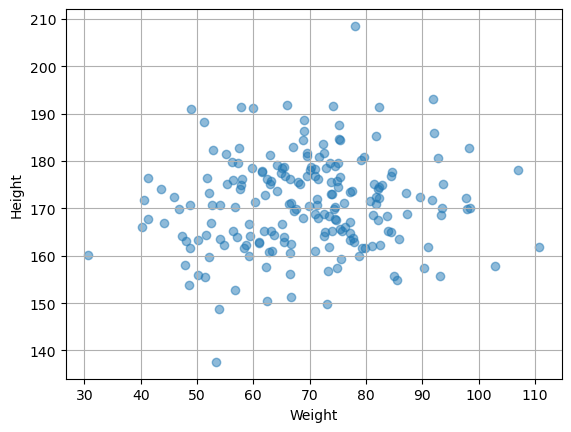

In [59]:
plt.scatter(data['Weight'], data['Height'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel("Height")
plt.grid(True)
plt.show()

In [60]:
#correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.095147
Height,0.095147,1.000000


c:\Users\nikhil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nikhil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


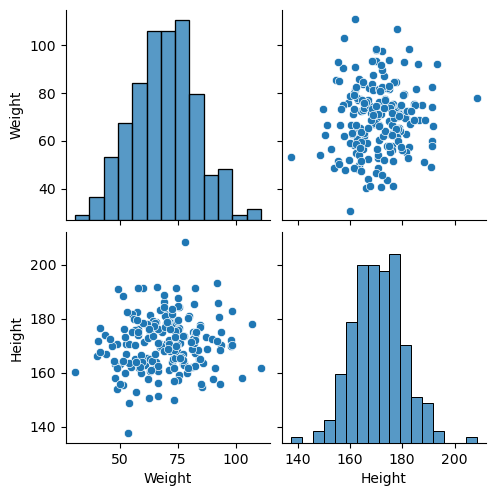

In [61]:
#seaborn for visualization 
import seaborn as sns
sns.pairplot(df)

In [72]:
#independent and dependent feature 
df 
#df.head()
X = df[['Weight']]
Y = df['Height']
print(X.head())
type(X)

Y.head()



      Weight
0  77.450712
1  67.926035
2  79.715328
3  92.845448
4  66.487699


(200,)

In [73]:
np.array(Y).shape

(200,)

In [76]:
# Train Test Split 
from sklearn.model_selection import train_test_split




In [78]:
X_train , X_test  , Y_train , Y_test  = train_test_split(X , Y , test_size=0.25 , random_state= 42 )

In [79]:
X_train.shape

(150, 1)

In [80]:
## standarization  
##  z score 
from sklearn.preprocessing import StandardScaler 

In [82]:
sclar = StandardScaler()
X_train = sclar.fit_transform(X_train)

In [83]:
X_test = sclar.transform(X_test)

In [85]:
#apply  simple linear regression  
from sklearn.linear_model import LinearRegression 

regression = LinearRegression()

regression.fit(X_train, Y_train)

LinearRegression()

In [87]:
regression.coef_

array([0.72307436])

In [88]:
regression.intercept_

171.6147340760266

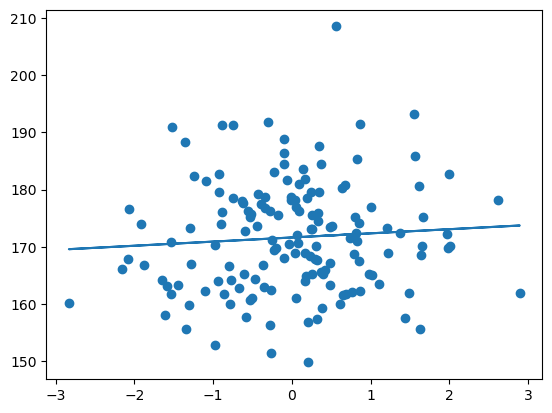

In [91]:
# plot the trainging data best fit line 



plt.scatter(X_train , Y_train)
plt.plot(X_train , regression.predict(X_train))

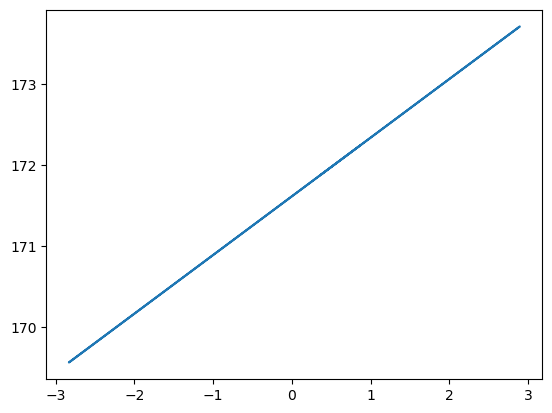

In [92]:
## prediction for test data 
Y_pred = regression.predict(X_test)

In [93]:
## performance metrix 

from sklearn.metrics import mean_absolute_error , mean_squared_error

In [94]:
mse = mean_squared_error(Y_test, Y_pred)

In [95]:
mae  = mean_absolute_error(Y_test, Y_pred)

In [98]:
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

105.57302921282742
7.735512145505481
10.274873683546062


In [99]:
# R squre 


from sklearn.metrics import r2_score

score = r2_score(Y_test , Y_pred)
print(score)

-0.07228475376348809


In [100]:
## ola linear regression   
import statsmodels.api  as sm

model = sm.OLS(Y_train , X_train).fit()

In [101]:
prediction = model.predict(X_test
                           )

In [103]:
print(prediction)

[ 0.21433659 -0.19688738 -0.04222958 -0.96209606  0.358856   -0.77119304
  0.78424858 -0.72833991  0.05997539  0.64884259 -0.96986726 -1.26194197
  1.11193168 -0.90792608  0.38273809  0.16108926 -0.64798544 -1.12022767
 -0.8391455  -1.5350692   0.2533668  -0.48111602 -0.40443154 -0.26941783
  0.19926868  0.6220901  -0.71949889  0.29803868 -0.72055621 -1.21787719
 -0.83558372 -0.37254358 -0.20561285 -0.59984585 -0.37649173  0.62221237
  0.2616372  -0.03587197  0.76294772 -1.03934769  0.69460072 -0.84580626
 -0.51561189  1.68342751 -0.10499729 -0.24719553 -0.87329253  0.21197296
  0.7412427   0.38946503]


In [104]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.007
Method:                 Least Squares   F-statistic:                           0.002637
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                       0.959
Time:                        16:59:35   Log-Likelihood:                         -984.87
No. Observations:                 150   AIC:                                      1972.
Df Residuals:                     149   BIC:                                      1975.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [105]:
## prediction for new data 
regression.predict(sclar.transform([[72]]))

c:\Users\nikhil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([171.70282648])